### Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, multivariate_normal
from scipy.integrate import odeint
from scipy.optimize import differential_evolution
import pandas as pd

%matplotlib inline
plt.style.use('seaborn')
sns.set(palette='Set2')
plt.rc('font', family='serif')
plt.rc('text', usetex=True)

ncolours = len(plt.rcParams['axes.prop_cycle'])
colours = [list(plt.rcParams['axes.prop_cycle'])[i]['color'] for i in range(ncolours)]

In [191]:
def A(x, *params):
    Cbr, Cab, Cm, Car, mb, ma, mm, ib, ia, im, N = params
    b0, ba, a0, m, r = np.maximum(x, np.zeros(5))
    return np.array([Cbr*(b0 + ba)*r + ib*r - Cab*(ba + a0)*b0 - ia*b0 - (Cm*m + im)*b0 - mb*b0 + ma*ba,
                     Cab*(ba + a0)*b0 + ia*b0 - (Cm*m + im)*ba - ma*ba - mb*ba,
                     Car*(ba + a0)*r + ia*r - (Cm*m + im)*a0 - ma*a0 + mb*ba,
                     (Cm*m + im)*(b0 + a0 + ba) - mm*m,
                     -Cbr*(b0 + ba)*r - ib*r - Car*(ba + a0)*r - ia*r + mb*b0 + ma*a0 + mm*m])

def B(x, *params):
    Cbr, Cab, Cm, Car, mb, ma, mm, ib, ia, im, N = params
    b0, ba, a0, m, r = np.maximum(x, np.zeros(5))
    return np.maximum(np.array([[Cbr*(b0 + ba)*r + ib*r + Cab*(ba + a0)*b0 + ia*b0 + (Cm*m + im)*b0 + mb*b0 + ma*ba,
                                 -Cab*(ba + a0)*b0 - ia*b0 - ma*ba, 0, -(Cm*m + im)*b0, -Cbr*(b0 + ba)*r - ib*r - mb*b0],
                                [-Cab*(ba + a0)*b0 - ia*b0 - ma*ba, Cab*(ba + a0)*b0 + ia*b0 + (Cm*m + im)*ba + ma*ba + mb*ba,
                                 -mb*ba, -(Cm*m + im)*ba, 0],
                                [0, -mb*ba, Car*(ba + a0)*r + ia*r + (Cm*m + im)*a0 + ma*a0 + mb*ba, -(Cm*m + im)*a0,
                                 -Car*(ba + a0)*r - ia*r - ma*a0],
                                [-(Cm*m + im)*b0, -(Cm*m + im)*ba, -(Cm*m + im)*a0, (Cm*m + im)*(b0 + a0 + ba) + mm*m, -mm*m],
                                [-Cbr*(b0 + ba)*r - ib*r - mb*b0, 0, -Car*(ba + a0)*r - ia*r - ma*a0, -mm*m,
                                 Cbr*(b0 + ba)*r + ib*r + Car*(b0 + a0)*r + ia*r + mb*b0 + ma*a0 + mm*m]
                               ]),
                      np.zeros((5,5)))

In [192]:
def path(x, t, *params):
    dt = t[1]-t[0]
    
    N = params[-1]
    
    x_t = []
    
    if isinstance(x, float) or isinstance(x, int):
        for  time in t:
            x_t.append(x)
            y = A(x, *params)*dt + np.sqrt(dt*B(x, *params)/N)*np.random.normal()
            x += y
    else:
        n_dim = len(x)
        x_0 = x.copy()
        for time in t:
            x_t.append(x_0.copy())
            y = A(x_0, *params)*dt + np.sqrt(dt/N)*np.random.multivariate_normal(np.zeros(n_dim), B(x_0, *params))
            x_0 += y
            
    return np.array(x_t)

In [204]:
Cbr = 0.018
Cab = 0.049
Cm = 0.078
Car = 0.021
mb = 0.003
ma = 0.013
mm = 0.017
ib = 0.0000001
ia = 0.0000001
im = 0.0000001
N = 200

params = (Cbr, Cab, Cm, Car, mb, ma, mm, ib, ia, im, N)

x0 = [0.1, 0.1, 0.1, 0.1, 0.6]

In [214]:
dt = 0.1

t_full = np.arange(0., 365*20., dt)
x_real = path(x0, t_full, *params)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6,  1.8]),
 <a list of 11 Text yticklabel objects>)

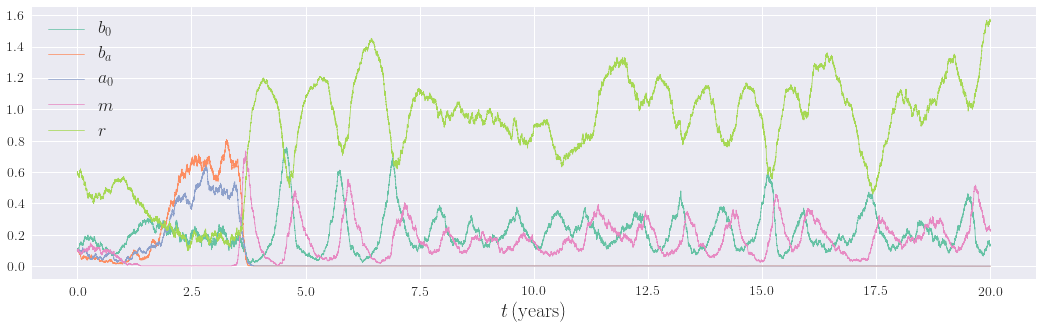

In [219]:
fig, ax = plt.subplots(1, figsize=(18,5))
labels = [r'$b_0$', r'$b_a$', r'$a_0$', r'$m$', r'$r$']
for i in range(5):
    ax.plot(t_full/365., x_real[:,i], linewidth=0.75, label=labels[i])
ax.set_xlabel(r'$t\, \mathrm{(years)}$', fontsize=20)
ax.legend(fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

### Code below is not updated...

Need to:
1. Import actual data and pack it into `observations`
2. Define bounds
3. Run estimation
4. Reconstruct process

In [76]:
bounds = [(1., 5.), (1., 5.), (10, 1000)]

observations = (artificial_data, artificial_timepoints)

estimation = differential_evolution(costfn, bounds, args=observations)

params_estim = tuple(estimation.x)

C:\Users\cesar\Anaconda2\lib\site-packages\ipykernel_launcher.py:42: RuntimeWarning: divide by zero encountered in log


In [77]:
x_estim = reconstruct(artificial_data, artificial_timepoints, params_estim)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 7 Text yticklabel objects>)

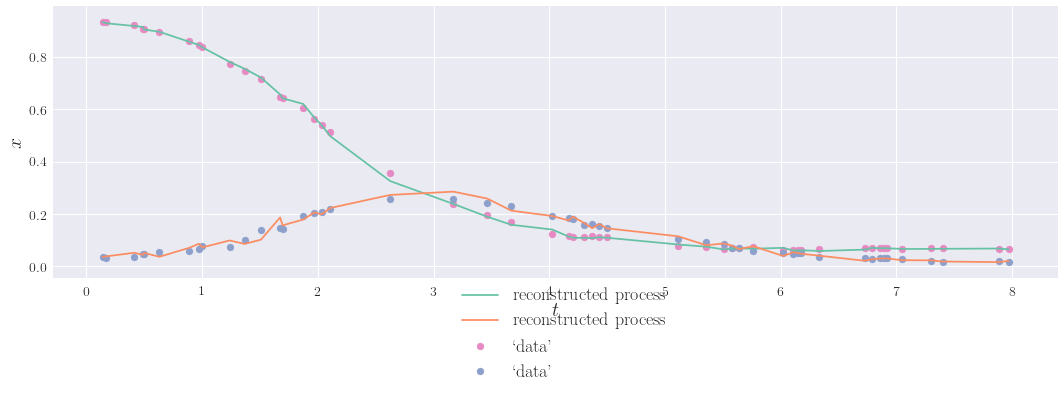

In [78]:
fig, ax = plt.subplots(1, figsize=(18,5))
ax.plot(artificial_timepoints, x_estim, label=r"reconstructed process")
if n_dims == 1:
    ax.scatter(artificial_timepoints, artificial_data, label=r"`data'", color=colours[1])
else:
    ax.scatter(artificial_timepoints, artificial_data[:, 0], color=colours[3], label=r"`data'")
    ax.scatter(artificial_timepoints, artificial_data[:, 1], color=colours[2], label=r"`data'")
ax.set_xlabel(r'$t$', fontsize=20)
ax.set_ylabel(r'$x$', fontsize=20)
ax.legend(fontsize=18, loc=(0.4,-0.4))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

In [79]:
init_cond = np.array([x0, 0.]) if n_dims == 1 else np.concatenate((x0, np.zeros(4)))
x_real_det = odeint(LNA, init_cond, t_full, args=params)[:, :n_dims]
x_estim_det = odeint(LNA, init_cond, t_full, args=params_estim)[:, :n_dims]

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 <a list of 8 Text yticklabel objects>)

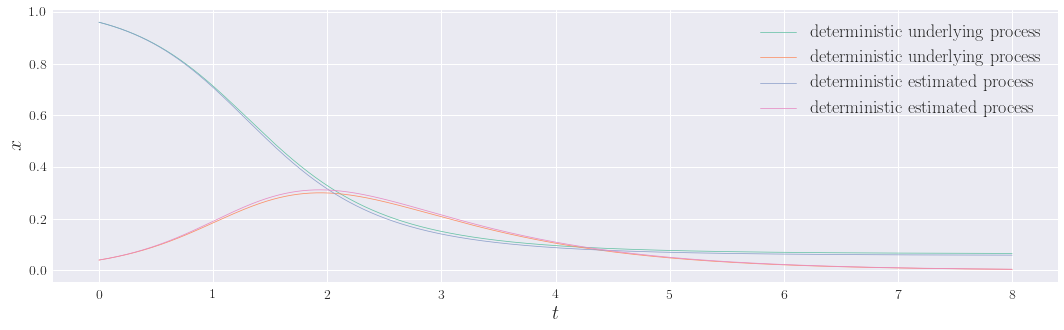

In [80]:
fig, ax = plt.subplots(1, figsize=(18,5))
ax.plot(t_full, x_real_det, linewidth=0.75, label=r"deterministic underlying process")
ax.plot(t_full, x_estim_det, linewidth=0.75, label=r"deterministic estimated process")
ax.set_xlabel(r'$t$', fontsize=20)
ax.set_ylabel(r'$x$', fontsize=20)
ax.legend(fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

In [81]:
if n_dims == 1:
    params_table = {'process': ['real', 'estimated'], r'$b$': [b, params_estim[0]], r'$d$': [d, params_estim[1]], r'$N$': [N, params_estim[2]]}
else:
    params_table = {'process': ['real', 'estimated'], r'$\beta$': [beta, params_estim[0]], r'$\gamma$': [gamma, params_estim[1]], r'$N$': [N, params_estim[2]]}
params_table = pd.DataFrame(params_table)
params_table.set_index(['process'])

,$N$,$\beta$,$\gamma$
process,,,
real,250.000000,2.970000,1.03
estimated,252.184486,2.979124,1.00
